In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [18]:
def generate_dataset(f, n, sigma=0.05):
    x = np.random.uniform(0, 1, n)
    return x.reshape((-1, 1)), np.apply_along_axis(f, 0, x) + np.random.normal(0, sigma, n)

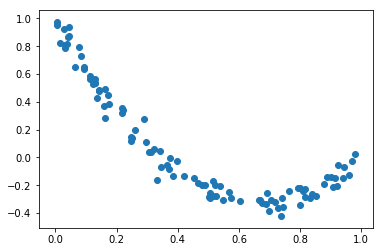

In [152]:
f = lambda x: 3*x**2 -4*x + 1
x, y = generate_dataset(f, 100)
plt.scatter(x, y)

In [153]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

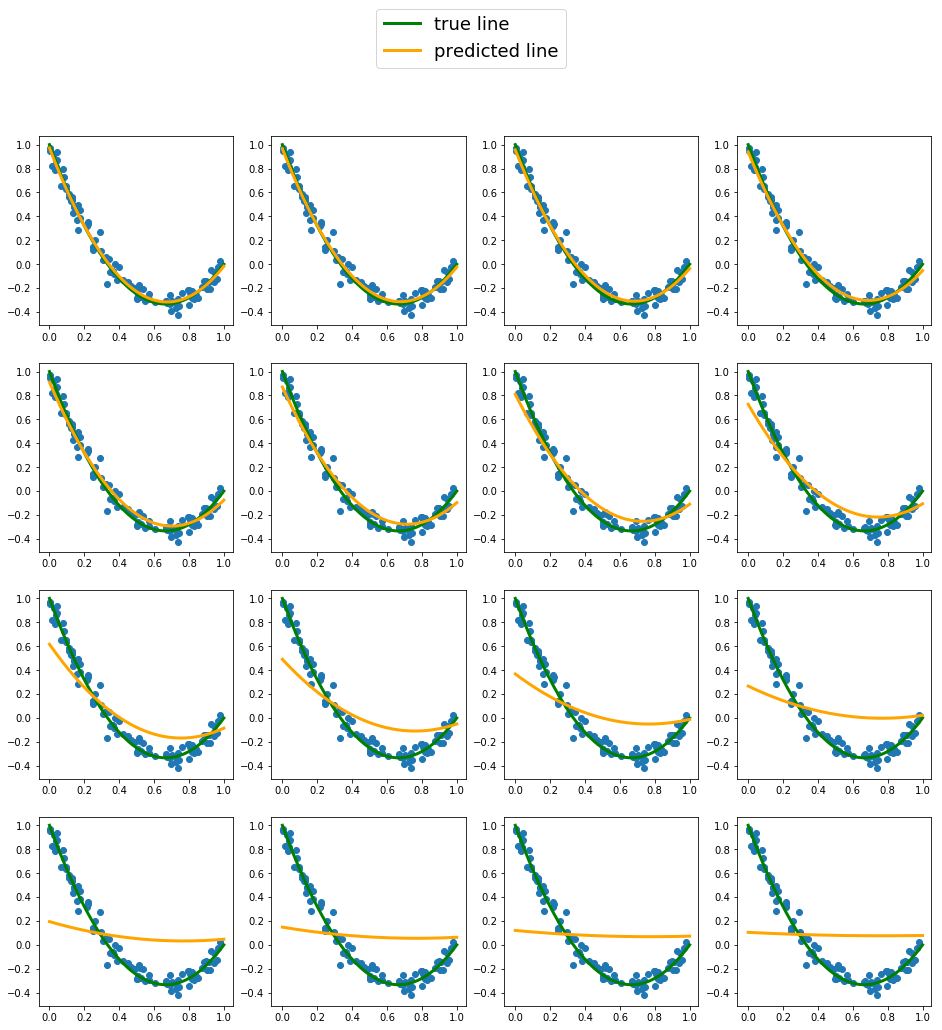

In [156]:
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))
xx = np.linspace(0, 1, 1000).reshape((-1, 1))
XX = np.hstack((xx, np.apply_along_axis(f, 0, xx)))
trueY = f(xx)


for i, l in enumerate(np.logspace(-1, 3, num=rows*cols)):
    ridge = Ridge(alpha=l)
    X = np.hstack((x, np.apply_along_axis(f, 0, x)))
    ridge.fit(X, y)
    idx = (i//cols, i%cols)
    predictedY = ridge.predict(XX)
    axes[idx].scatter(x, y)
    line1, = axes[idx].plot(xx, trueY, 'g', linewidth=3)
    line2, = axes[idx].plot(xx, predictedY, 'orange', linewidth=3)

fig.legend([line1, line2], ['true line', 'predicted line'], 'upper center', fontsize=18)